# Part 1

# Part 2

In [22]:
# importing basic and fundamental libaries
import pandas as pd

# imports for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from wordcloud import WordCloud
from collections import Counter

In [6]:
# Importing the train & test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
print("See distribution of messages per SDG : ")
count = train.groupby("sdg").count()["text"].reset_index().sort_values(by="text", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per SDG : 


,sdg,text
4,5,3438
3,4,2999
6,7,2473
5,6,2247
0,1,2190
2,3,2132
1,2,1963
10,11,1798
12,13,1695
7,8,1218


In [10]:
# Map the target variable name to their code for better understanding
def sdglabler(train):
    sdgLables = {1: "No poverty", 2: "Zero Hunger", 3: "Good Health and well-being", 4: "Quality Education", 5: "Gender equality", 6: "Clean water and sanitation", 7: "Affordable and clean energy", 9: "Industry, Innovation and Infrustructure", 8: "Decent work and economic growth",
                 10: "Reduced Inequality", 13: "Climate Action", 11: "Sustainable cites and communities", 12: "Responsible consumption and production", 14: "life below water", 15: "Life on land", 16: "Peace , Justice and strong institutions", 17: "Partnership for the goals"}
    train['SDG_Labels'] = train['sdg'].map(sdgLables)
    
sdglabler(train)
# Confirm the dataset
train.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,SDG_Labels
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,Indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1,"Industry, Innovation and Infrustructure"
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,Manufacturing value added as a percentage of G...,9,0,3,1.000000,2,"Industry, Innovation and Infrustructure"
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,To Share or Not to Share: That is the Question...,5,2,7,0.555556,3,Gender equality
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"As of 2004, parents can work without losing th...",4,2,2,0.000000,4,Quality Education
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,A question of considerable policy relevance is...,10,1,4,0.600000,5,Reduced Inequality


In [11]:
#for a better visualisation let view by the lables
print("See distribution of messages per sdg : ")
count = train.groupby("SDG_Labels").count()["text"].reset_index().sort_values(by="text", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per sdg : 


,SDG_Labels,text
4,Gender equality,3438
9,Quality Education,2999
0,Affordable and clean energy,2473
1,Clean water and sanitation,2247
8,No poverty,2190
5,Good Health and well-being,2132
13,Zero Hunger,1963
12,Sustainable cites and communities,1798
2,Climate Action,1695
3,Decent work and economic growth,1218


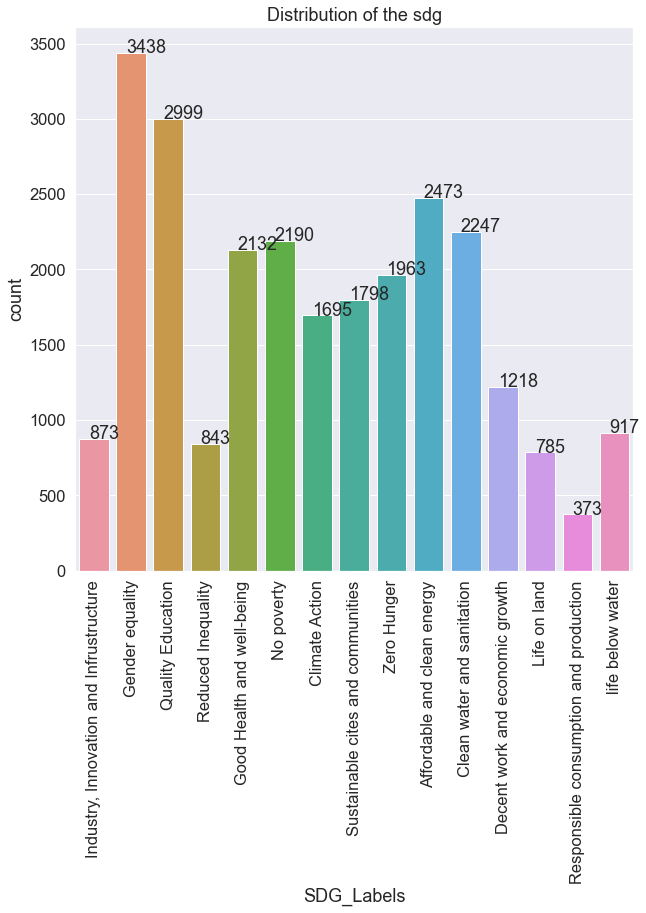

In [24]:
# A visual check of the distribution of the sdg between the classes
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,10))
graph = sns.countplot(ax=ax1,x='SDG_Labels', data=train)
graph.set_xticklabels(graph.get_xticklabels())
plt.tick_params(axis='x', rotation=90)
plt.title("Distribution of the sdg")
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/3., height + 0.1,height)

### Observations

>* It can be clearly seen that __Gender equality__ has the most text of all the SDGs. This means that more Documents have been written and published on gender equality, suggesting that Gender Equality is a pressing issue.
>* This is closely followed by Quality Education and Affordable and Clean Energy.
>* At the other end, Responsible consumption and production has the least number of text, implying that it is the least documented and researched SDG.
>. Also, Life on land, Reduced Inequality, Industry, Innovation and Infrastructure, and Life below water all have less than 1000 text. These are all important part of the SDGs but less documents have been written on them
>*  Gender equality,quality education and affordable and clean energy has the highest number of text.
>*  Responsible consumption and production has the lowest number of text.
>*  A glance look at the data gives an overview of how the text data is distributed among the various SDGs

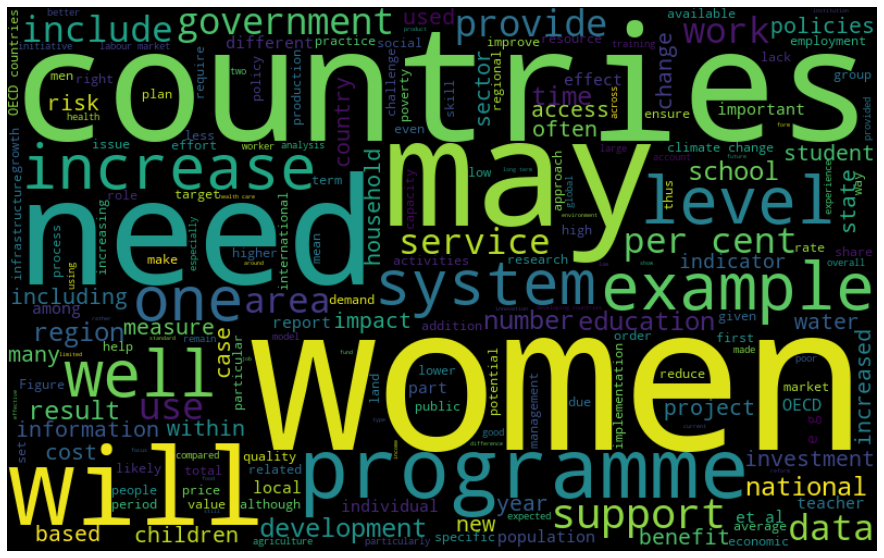

In [20]:
# Most occurring words of the train set
words_train=" ".join([word for word in train['text']])
wordcloud = WordCloud(background_color='black',width=800, height=500,random_state=46).generate(words_train)

# Displaying the word cloud image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Observations

>* The top three words are __need, countries and women__. The frequency of these words means that a lot of the same information/documents are being written by large audiences.
>* It is no surprise that __Women__ is one of the most frequent word considering that __SDG 5 (Gender Equality)__ has the most number of text. This further goes to show how much work and research are being done to achieve this goal.

# Part 3